<a href="https://colab.research.google.com/github/AYUSH-SHARMA25/HOTEL-BOOKING-ANALYSIS-PROJECT/blob/main/Hotel_Booking_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Impoting libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting the Gdrive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset
hotel_booking_data = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of Hotel Bookings.csv')

In [4]:
# CREATING A COPY OF THE DATA AND CLEANING THE DATA FOR FURTHER ANALYSIS
HB_data = hotel_booking_data.copy()

In [5]:
# Inspecting the data 
HB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
HB_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


Now we will perform data cleaning in some steps 
1. In the children column there are just 4 NaN values so we can repalce those  either with mean or with medain of rest of the values.  
2. We will create a new column named 'total_person' by adding the columns adults,children,babies. 
3. Droping the columns 'total_of_special_requests','booking_changes' and 'meal' as we will not be needing them    






In [7]:
# Let's clean the data
HB_data['children'].fillna(HB_data['children'].mean(),inplace=True)

In [8]:
HB_data.drop({'total_of_special_requests','booking_changes','meal'},axis=1,inplace=True)

In [ ]:
HB_data['total_person'] = HB_data['adults'] + HB_data['children'] + HB_data['babies']

In [9]:
# Let's see the changes 
HB_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


 > NOW WE BEGIN OUR ANALYSIS 












Text(0, 0.5, 'number of bookings')

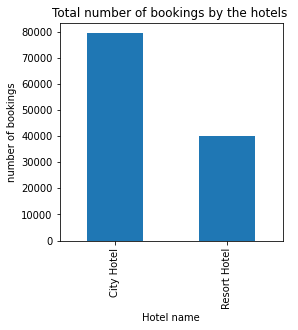

In [20]:
# first let's see how many total bookings were made by both the hotels
total_bookings = HB_data['hotel'].value_counts()

plt.rcParams['figure.figsize'] = (4,4)
total_bookings.plot(kind='bar')
plt.title('Total number of bookings by the hotels ')
plt.xlabel('Hotel name')
plt.ylabel('number of bookings')

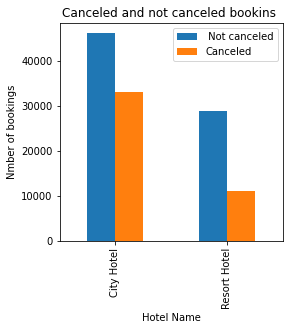

In [21]:
# now let's see how many of those bookings got cancelled and how many not 
canceled_and_not_canceled_bookings = HB_data.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
canceled_and_not_canceled_bookings.plot(kind='bar')
plt.title('Canceled and not canceled bookins ')
plt.xlabel('Hotel Name')
plt.ylabel('Nmber of bookings')
plt.legend([' Not canceled','Canceled'])

**INFERENCE**

We can clearly see that approx. 33000 bookings in City Hotel got canceled which is approximately 40% of the total bookings
  
whereas in Resort Hotel approx. 11000 bookings got canceled  which is approximately 30% of the total bookings
 


Text(0, 0.5, 'NUMBER OF BOOKINGS')

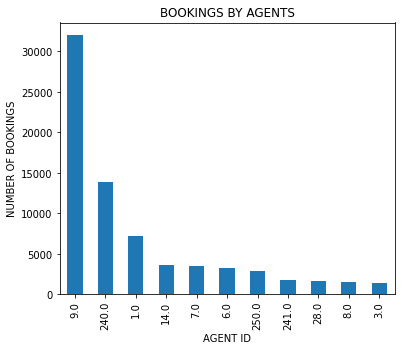

In [46]:
# let's see which agent made most number of bookings
agent_booking = HB_data['agent'].value_counts()
plt.rcParams['figure.figsize'] = (6,5)
top_10_agents = agent_booking.sort_values(ascending=False).iloc[0:11]
 
top_10_agents.plot(kind='bar')
plt.title('BOOKINGS BY AGENTS')
plt.xlabel('AGENT ID')
plt.ylabel('NUMBER OF BOOKINGS')

THE agent with ID number 9.0 has made most number of bookings followed by agents 240.0 and 1.0  

Text(0.5, 1.0, 'Percentage of reapeated guests')

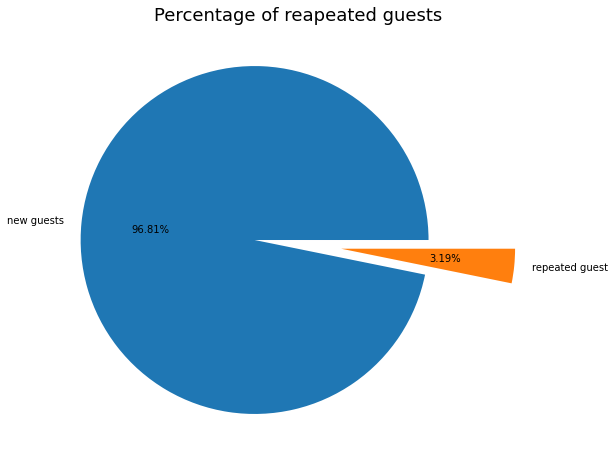

In [78]:
# now let's percentage of repeated customers 
repeated_cust = HB_data.groupby('is_repeated_guest')
df1 = pd.DataFrame(round((repeated_cust.size()/HB_data.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
labels = 'new guests','repeated guest'
plt.figure(figsize=(8,8))
plt.pie(df1['Booking_%'],autopct="%.2f%%",explode=[0.25]*2,labels=labels)
plt.title('Percentage of reapeated guests',fontsize =18)